# Bike Sharing Assignment

### Problem Statement:
Consider a bike-sharing company that offers a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. They are planing to accelerate their revenue as soon as the ongoing lockdown comes to an end. They want to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation.
For this, they have gathered a large dataset on daily bike demands across the American market based on some factors.
Essentially, the company wants to know —
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands.


# Import Data From Google Drive

In [270]:
# I am using google colaboratory envirnoment for this project.
# The data files are uploaded in the personal google drive.
# Here, I am importing those files from the google drive.

%%shell

if [ ! -f day.csv ]; then
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=143nJG3J59JIGXbzBPSz9fE58CHRWjtFc' -O day.csv
fi

if [ ! -f dictionary.txt ]; then
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fJhXEICoHOokZxfwAkwDkam6teT1XrZT' -O dictionary.txt
fi


# Import Libraries

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import rcParams

# Load Data in DataFrame

In [272]:
df=pd.read_csv('day.csv')

# Data understanding

In [273]:
# Check dataframe's shape and the first 5 rows.
# There are 730 rows and 16 columns.

print(df.shape)
df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [274]:
# Understanding the meaning each feature using data dictionay.

!head -n 27 dictionary.txt

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	


In [275]:
# Checking for null values and data types.
# There are no null values in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [276]:
# Checking summary statistics.

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA

## Visualising Numeric Variables
Here, I have performed a combined univariate and bivarite analysis on the numerical variables.

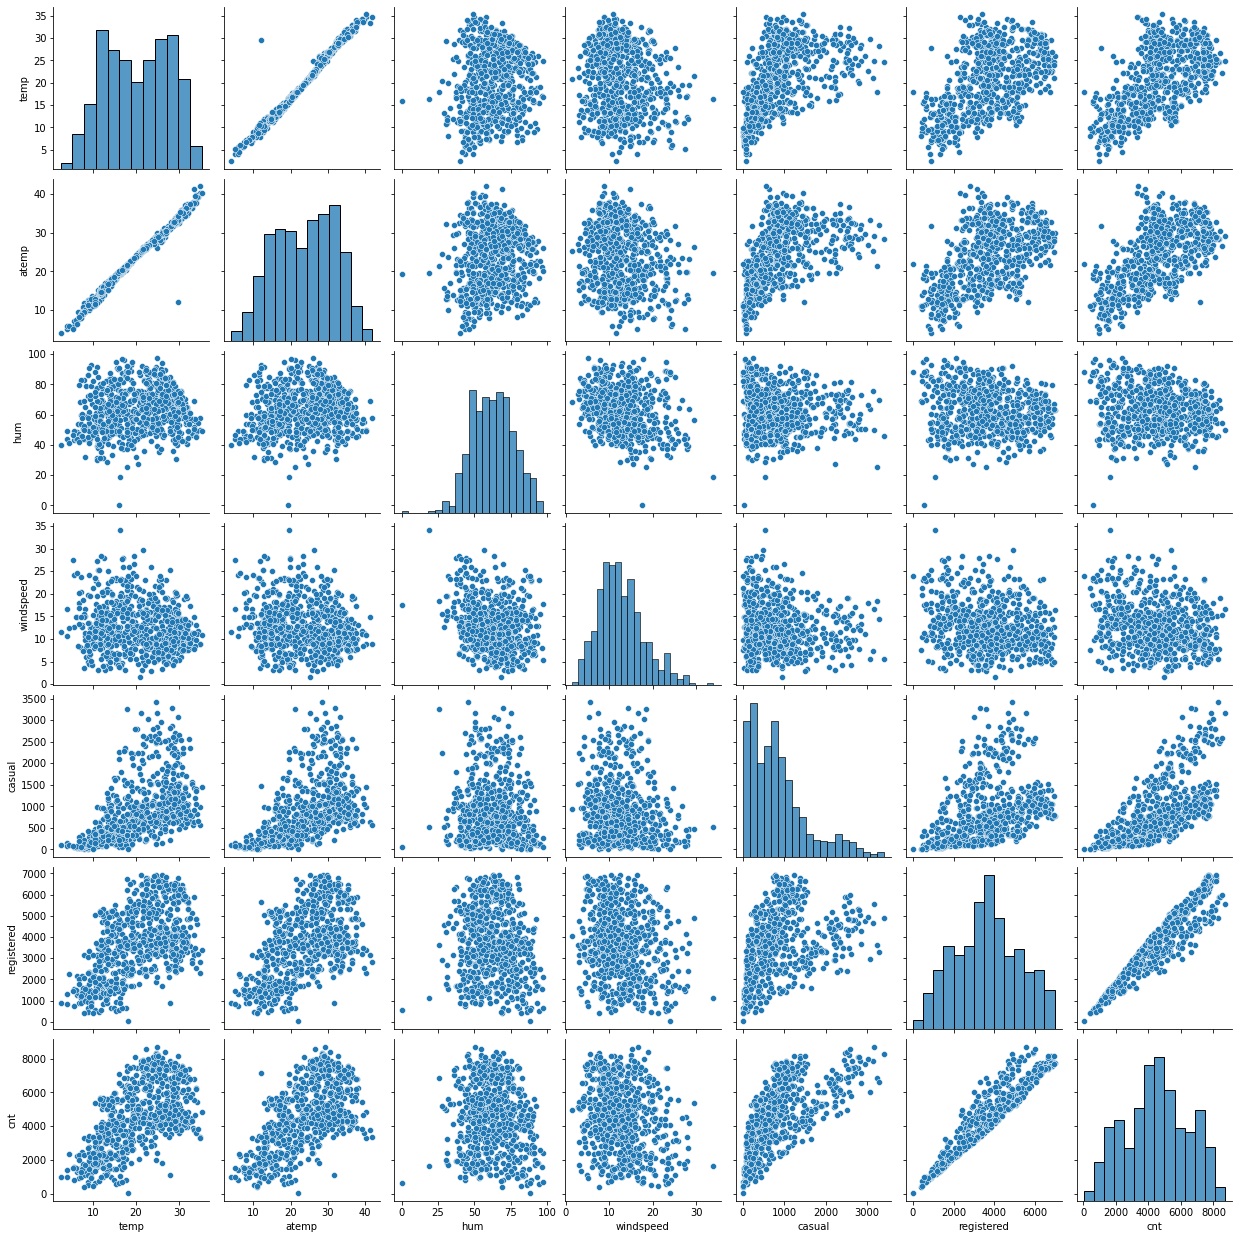

In [277]:
# From the univariate analysis (digonal plots), we can see that all the numercal variables have approximate normal distribution.
# 'temp', 'atemp' have somewhat linear relationship with the target variable.
# 'casual' and 'registered' variables have strong linear relationship with the target variable.

num_var=['temp','atemp','hum','windspeed','casual','registered','cnt']

sns.pairplot(df[num_var])
plt.show()

## Visualising Categorical Variables
Here, I have performed bivarite analysis between categorical variables and target variable.

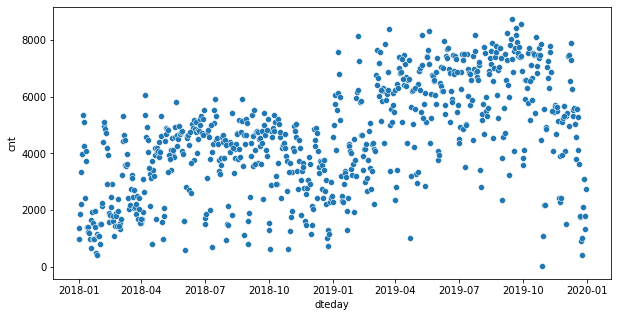

In [278]:
# To visualise the trend of the target variable with time, we need to convert 'dteday' columns into correct datetime format.
# From the plot, we can see that the bike demand has increased from 2018 to 2019.
# Typically, the demand increases and reaches pick in the middle of the year and then again drops at the end of the year.
# This shows, non linear relationship between target variable and time.

df['dteday']=pd.to_datetime(df['dteday'])
plt.figure(figsize=(10,5))
sns.scatterplot(x='dteday',y='cnt',data=df)

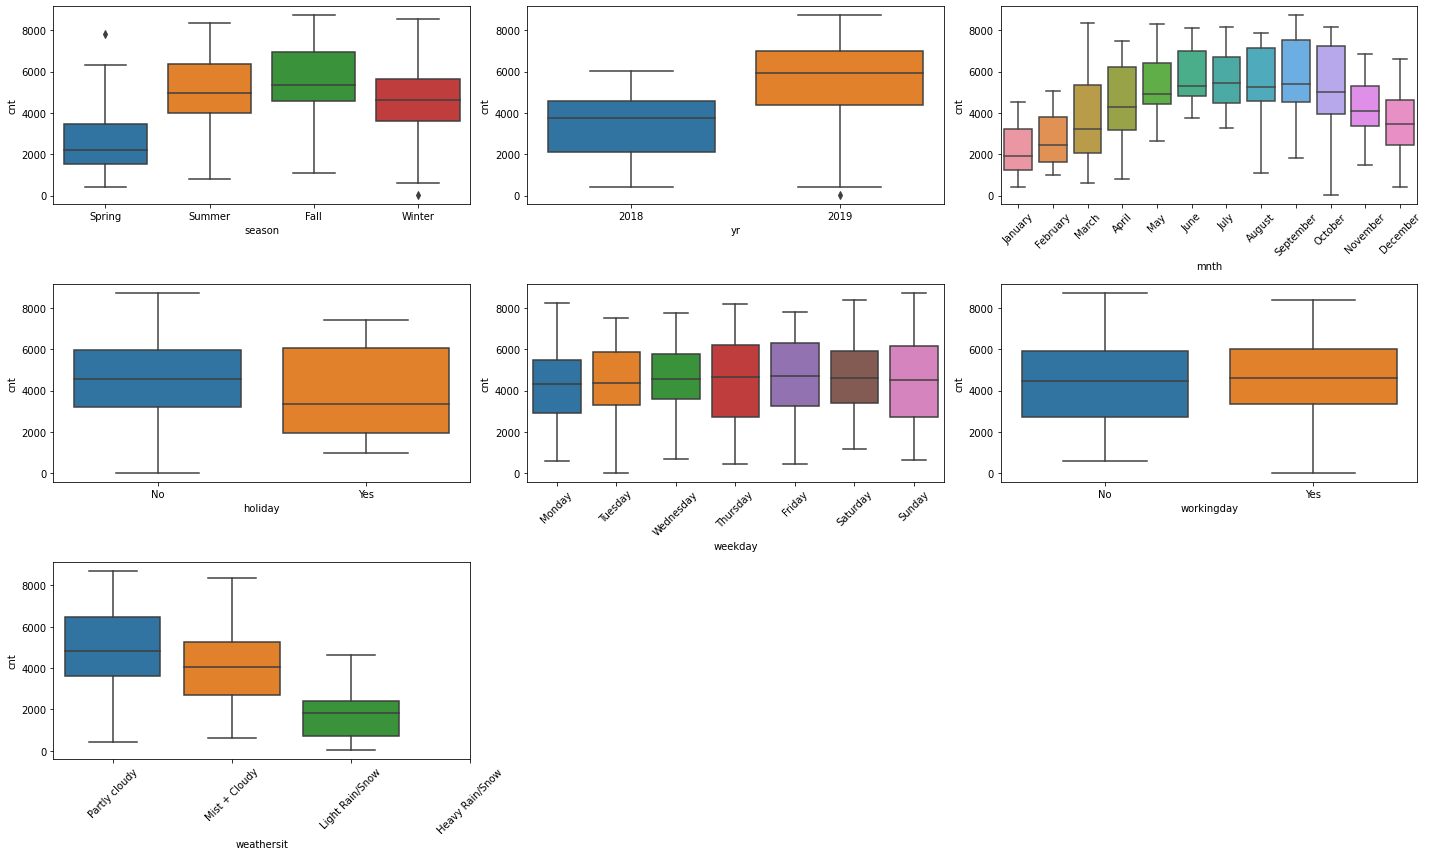

In [279]:
# Here, I assumed week starts from Monday.
# From the plots below, we can see that bike demand higher in summer and fall seasons and lower in winter and spring seasons.
# Bike demand is higher on working days and lower on holidays.
# Bike demand is lower during bad weather (rain and snow)

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.xticks(range(4),['Spring', 'Summer', 'Fall', 'Winter'])
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.xticks([0,1],[2018,2019])
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.xticks(range(12),['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],rotation=45)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.xticks([0,1],['No','Yes'])
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.xticks(range(7),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],rotation=45)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.xticks([0,1],['No','Yes'])
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.xticks([0,1,2,3],['Partly cloudy','Mist + Cloudy','Light Rain/Snow','Heavy Rain/Snow'],rotation=45)
plt.tight_layout()
plt.show()

# Data Preparation
From the data understanding and EDA, I have identified a few issues with the data as mentioned below:

* Target variable (cnt) is the sum of 'casual' and 'registered' variables, therefore, model built using 'casual' and 'registered' would have surprisingly high accuracy making other variables useless. Furthermore, these variables may not be available during prediction on the new dataset in production. Hence, 'casual' and 'registered' should be dropped.
* 'yr' variable contains only two values representing 2018 and 2019, however, we need model that would be applicable to post covid period (ie. 2020 onwards). Hence, to improve the applicability of the model, I have decided to drop 'yr' variable.
* 'dteday' column is redundant as its information is already present in 'weekday', 'mnth' and 'yr' columns combined together. Hence, it could be dropped.
* 'instant' column doesn't contain useful information. Hence, I drop it.
* Categorical variables should be converted into dummy variables.
* After converting categorical variables to dummy variables, the corresponding column should be dropped.


We address these issues in the section below.

## Change the datatype of 'dteday' variable

In [280]:
df['dteday']=pd.to_datetime(df['dteday'])

## Create Derived Metrics
In EDA section, we saw  non-linear relationship between the bike demand and time. The plot between target variable ('cnt') and date looks like two inverted parabolas. Hence, I decided to create new variables that depend on time.
* 'day_diff' = It is the number of days since the first record of bike rental in the dataset (difference in days between the first datapoint and current datapoint).
* 'day_diff_sqr'= It is the square of 'day' (to include **non-linearity** in the model)

In [281]:
df['day_diff']=df['dteday'].apply(lambda x:(x-df['dteday'][0]).days)
df['day_diff_sqr']=df['day_diff']**2

### Visualising the Derived Metrics

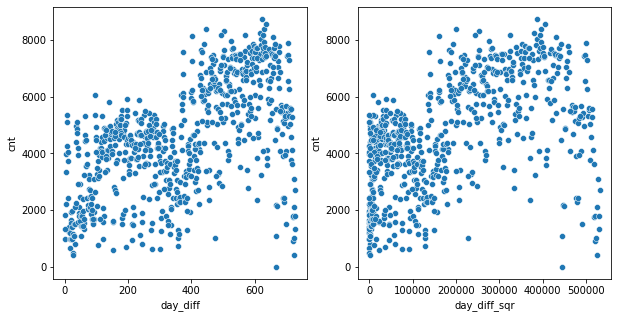

In [282]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'day_diff', y = 'cnt', data = df)
plt.subplot(1,2,2)
sns.scatterplot(x = 'day_diff_sqr', y = 'cnt', data = df)

## Data Cleaning

In [283]:
# Drop unnecessary columns
# 'dteday' column is redundant as its information is already present in 
# 'weekday', 'mnth' and 'yr' columns combined together. Hence, it could be dropped.

df=df.drop(columns=['dteday','instant','casual', 'registered','yr'])

## Create Dummy Variables

In [284]:
# In this cell, I have defined a function to create dummy variables for categorical variables.

def create_dummy_var(df,col_name):
  dummy_var_df=pd.get_dummies(df[col_name], drop_first = True, prefix=col_name)
  df=df.drop(col_name,axis=1)
  df=pd.concat([df, dummy_var_df], axis = 1)
  return df

In [285]:
dummy_var=['season', 'mnth', 'weekday', 'weathersit']

for col_name in dummy_var:
  df=create_dummy_var(df,col_name)

In [286]:
print(df.shape)
df.head()

(730, 31)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_diff,day_diff_sqr,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,31,961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,59,3481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,90,8100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,120,14400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [287]:
from sklearn.model_selection import train_test_split

# setting random seed for consistant results
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [325]:
# Checking shape the of training set

print(f'df_train shape = {df_train.shape}')
print(f'df_test shape = {df_test.shape}')

df_train shape = (510, 30)
df_test shape = (219, 30)


## Dividing Training set into X and Y sets for the model building

In [289]:
y_train = df_train.pop('cnt')
X_train = df_train

In [290]:
# Checking shapes again

print(f'X_train shape = {X_train.shape}')
print(f'Y train shape = {y_train.shape}')

X_train shape = (510, 30)
Y train shape = (510,)


## Rescaling the Features

In [291]:
# I used MinMax scaling on numerical columns.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_var=['temp', 'atemp', 'hum', 'windspeed','day_diff','day_diff_sqr']
X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [292]:
print(f'X_train shape = {X_train.shape}')
X_train.head()

X_train shape = (510, 30)


,holiday,workingday,temp,atemp,hum,windspeed,day_diff,day_diff_sqr,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0.804570,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0.626011,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,0.342418,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0.438360,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [293]:
X_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,day_diff,day_diff_sqr,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.503954,0.339089,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.292040,0.300434,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.248970,0.061986,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.507555,0.257612,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.759272,0.576494,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model building and Variable Selection
There are total of 30 variables. It would be difficult to analyze the influence of all the variables on the target variable. Hence, I have decided to first:
* Use automatic variable selection to remove less important variables. 
* Then, perform manual variable selection technique. 

The goal here is to build a model having high performance but also the small number of important variables.

## Model with All Variables (ref_model)

This model will serve as a reference to undestand the effect of variable selection on model performance

In [294]:
import statsmodels.api as sm

# Add a constant
X_train_ref = sm.add_constant(X_train)

# Create a first fitted model
lr_ref = sm.OLS(y_train, X_train_ref).fit()

# Print a summary of the linear regression model obtained
# We can see that lot of dummy variables created from 'mnth' and 'weekday' have high p-values
print(lr_ref.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     70.34
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.62e-153
Time:                        17:07:52   Log-Likelihood:                -4164.4
No. Observations:                 510   AIC:                             8389.
Df Residuals:                     480   BIC:                             8516.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1322.6792    308.976      4.281   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Automatic Variable Selection using RFE

In [295]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [296]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day_diff', True, 1),
 ('day_diff_sqr', False, 2),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', False, 7),
 ('mnth_5', False, 6),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', False, 8),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 9),
 ('weekday_2', False, 5),
 ('weekday_3', False, 10),
 ('weekday_4', False, 11),
 ('weekday_5', False, 3),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [297]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'day_diff', 'season_2', 'season_3', 'season_4', 'mnth_3', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [298]:
X_train.columns[~rfe.support_]

Index(['day_diff_sqr', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_9', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [299]:
# Create new training data (X_train_ref) containing only RFE selected variables

X_train_rfe=X_train[col_rfe]
print(f'X_train_rfe = {X_train_rfe.shape}')

X_train_rfe = (510, 20)


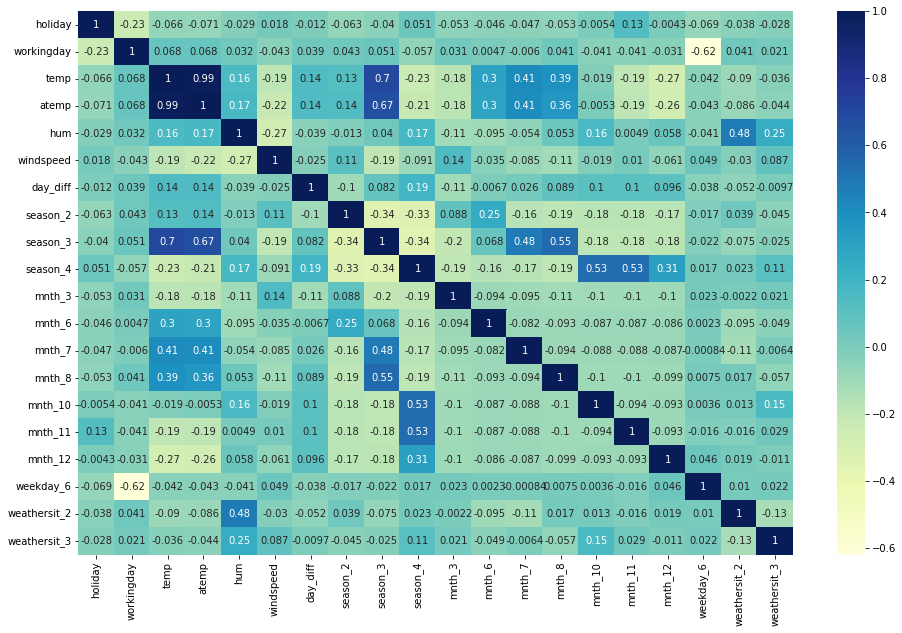

In [326]:
# Let's check the correlation coefficients to see which variables are highly correlated
# 'temp' and 'atemp' are highly correlated.
# 'season_3' is moderately correlated with 'temp' and 'atemp'

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Model after RFE (model_1)

In [301]:
# Building model using statsmodel, for the detailed statistics

# Adding a constant variable
X_train_1 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_1 = sm.OLS(y_train,X_train_1).fit() 

# Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     102.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.77e-160
Time:                        17:07:54   Log-Likelihood:                -4167.2
No. Observations:                 510   AIC:                             8376.
Df Residuals:                     489   BIC:                             8465.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1405.2744    288.232      4.875   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [302]:
# Defining a function to calculate the VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
  vif = pd.DataFrame()
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

In [303]:
calculate_vif(X_train_1)

,Features,VIF
3,temp,61.82
0,const,55.47
4,atemp,54.78
10,season_4,6.28
9,season_3,6.03
16,mnth_11,3.42
15,mnth_10,3.33
8,season_2,2.70
17,mnth_12,2.28
14,mnth_8,2.18


From here onwards, we will fist drop the variables having high p-value and high VIF. Then, we will drop the variables having high p-values followed by high VIF.

## Drop 'atemp' due to high p-value and high VIF (model_2)

In [304]:
# Dropping highly correlated variables and insignificant variables

X_train_2 = X_train_1.drop('atemp', 1,)

lr_2 = sm.OLS(y_train, X_train_2).fit()

# Print the summary of the model
print(lr_2.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.70e-161
Time:                        17:07:55   Log-Likelihood:                -4167.2
No. Observations:                 510   AIC:                             8374.
Df Residuals:                     490   BIC:                             8459.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1407.3835    287.554      4.894   

In [305]:
calculate_vif(X_train_2)

,Features,VIF
0,const,55.32
9,season_4,6.28
8,season_3,6.00
3,temp,4.72
15,mnth_11,3.41
14,mnth_10,3.33
7,season_2,2.70
16,mnth_12,2.28
13,mnth_8,2.14
12,mnth_7,2.08


## Drop 'mnth_3' due to high p-value (mode_3)

In [306]:
# Dropping highly correlated variables and insignificant variables

X_train_3 = X_train_2.drop('mnth_3', 1,)

lr_3 = sm.OLS(y_train, X_train_3).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     113.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.42e-162
Time:                        17:07:55   Log-Likelihood:                -4168.3
No. Observations:                 510   AIC:                             8375.
Df Residuals:                     491   BIC:                             8455.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1463.3609    285.255      5.130   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [307]:
calculate_vif(X_train_3)

,Features,VIF
0,const,54.32
9,season_4,6.21
8,season_3,5.76
3,temp,4.69
14,mnth_11,3.40
13,mnth_10,3.31
7,season_2,2.64
15,mnth_12,2.26
12,mnth_8,2.14
11,mnth_7,2.07


## Drop 'holiday' due to high p-value (model_4)

In [308]:
# Dropping highly correlated variables and insignificant variables

X_train_4 = X_train_3.drop('holiday', 1,)

lr_4 = sm.OLS(y_train, X_train_4).fit()

# Print the summary of the model
# It can be seen that all the variables at this stage have p<0.05
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     119.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.53e-162
Time:                        17:07:55   Log-Likelihood:                -4169.7
No. Observations:                 510   AIC:                             8375.
Df Residuals:                     492   BIC:                             8452.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1390.0225    282.269      4.924   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [309]:
calculate_vif(X_train_4)

,Features,VIF
0,const,53.00
8,season_4,6.18
7,season_3,5.76
2,temp,4.68
13,mnth_11,3.37
12,mnth_10,3.31
6,season_2,2.63
14,mnth_12,2.25
11,mnth_8,2.13
10,mnth_7,2.05


## Drop 'season_4' due to high VIF (model_5)



In [310]:
# Dropping highly correlated variables and insignificant variables

X_train_5 = X_train_4.drop('season_4', 1,)

lr_5 = sm.OLS(y_train, X_train_5).fit()

# Print the summary of the model
# It can be seen that all the variables at this stage have p<0.05
# dropping 'season_4' have significantly reduced the model performance.
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.19e-152
Time:                        17:07:55   Log-Likelihood:                -4197.5
No. Observations:                 510   AIC:                             8429.
Df Residuals:                     493   BIC:                             8501.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1328.2204    297.661      4.462   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [311]:
calculate_vif(X_train_5)

,Features,VIF
0,const,52.96
7,season_3,5.32
2,temp,4.32
6,season_2,2.43
10,mnth_8,2.12
9,mnth_7,2.04
3,hum,1.98
1,workingday,1.66
14,weekday_6,1.65
15,weathersit_2,1.58


## Drop 'season_3' instead of 'season_4' due to high VIF (model_6)
This model is selected as the final model

In [312]:
# Dropping highly correlated variables and insignificant variables

X_train_6 = X_train_4.drop('season_3', 1,)

lr_6 = sm.OLS(y_train, X_train_6).fit()

# Print the summary of the model
# It can be seen that all the variables at this stage have p<0.05
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     124.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.56e-161
Time:                        17:07:55   Log-Likelihood:                -4175.2
No. Observations:                 510   AIC:                             8384.
Df Residuals:                     493   BIC:                             8456.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1335.5878    284.531      4.694   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [313]:
# VIF for all variables is also <5 except for season_4 but I decided to keep it as it has high impact on the target variable.
calculate_vif(X_train_6)

,Features,VIF
0,const,52.82
7,season_4,5.71
12,mnth_11,3.36
11,mnth_10,3.28
2,temp,2.87
13,mnth_12,2.25
3,hum,1.97
9,mnth_7,1.93
10,mnth_8,1.88
1,workingday,1.66


# Residual Analysis of the train data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

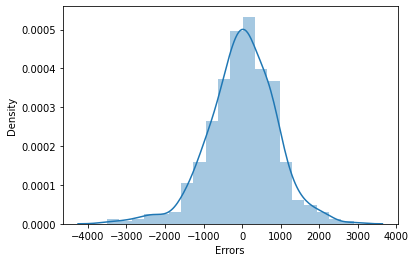

In [315]:
y_train_predict = lr_6.predict(X_train_6)

# Plot the histogram of the error terms
# Plot below shows the approximate normal distribution of errors, validating the assumption.

fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
plt.xlabel('Errors')   

# Making Predictions Using the Final Model
Here, I have predicted the bike demand on the test set using final model.

In [316]:
df_test[num_var] = scaler.fit_transform(df_test[num_var])
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_diff,day_diff_sqr,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,4546.981735,0.490918,0.322314,0.264840,0.246575,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,1898.633630,0.284993,0.297809,0.442259,0.432005,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,3303.500000,0.255495,0.065800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,4579.000000,0.476648,0.227877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,5869.500000,0.735577,0.541611,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [317]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test=df_test

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
X_test = X_test[X_train_6.columns]

print(f'X_test shape = {X_test.shape}')
print(f'y_test shape = {y_test.shape}')

X_test shape = (219, 17)
y_test shape = (219,)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [318]:
# Making predictions using the final model

y_test_pred = lr_6.predict(X_test)

# Model Evaluation


In [327]:
# Calculating R^2 on the test set

from sklearn.metrics import r2_score

# Performance on the test set is decent.
print(f'R2 on test-set = {r2_score(y_test, y_test_pred)}')

R2 on test-set = 0.7389121261339007


Text(0, 0.5, 'y_pred')

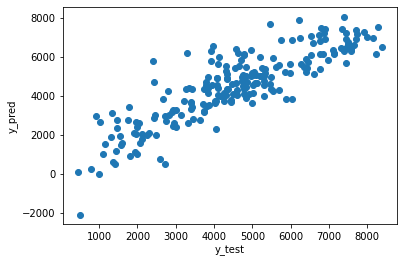

In [320]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
# fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')      

# Model Interpretation

In [321]:
# Based on the performance (R2 = 0.801) and using variable selection, 
# I have chosen model_6 as the final model.
# I have reduced the number of variables from 30 to 16 (almost ~50% reduction).
# If we don't consider the dummy variables then we have only 9 unique variables in the final model.
# 'temp', 'day_diff' and 'weathersit_3' are the top three features having most influence on the bike demand.
# 'temp' is positively correlated with the bike demand, suggesting bike demand is higher during summer.
# 'day_diff' shows that bike demand has an increasing trend with the time so company should increase the number of bikes every year.
# 'weathersit_3' has a negative coefficient indicating a decrease in bike demand during
# rainy and snowy weather, its because people tend to avoid travelling in rainy and snowy conditions.
# Humidity is high during rainy season and is  has negative coefficient supporting the previous observation.

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     124.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.56e-161
Time:                        17:07:56   Log-Likelihood:                -4175.2
No. Observations:                 510   AIC:                             8384.
Df Residuals:                     493   BIC:                             8456.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1335.5878    284.531      4.694   

# Data generated for answering subjective questions


## Question 1

In [323]:
num_col=['temp','atemp','hum','windspeed','day_diff','day_diff_sqr']
X_train_num_col=X_train[num_col]

# Add a constant
X_train_num_col = sm.add_constant(X_train_num_col)

lr_num_col = sm.OLS(y_train, X_train_num_col).fit()

# Print the summary of the model
print(lr_num_col.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     206.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.17e-132
Time:                        17:07:56   Log-Likelihood:                -4270.9
No. Observations:                 510   AIC:                             8556.
Df Residuals:                     503   BIC:                             8586.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2423.4216    302.344      8.015   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Question 4

Text(0.5, 0, 'y')

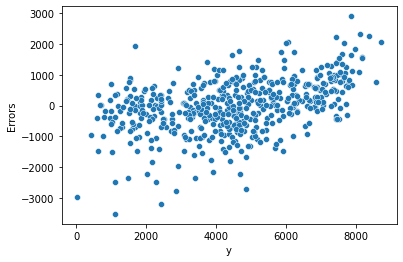

In [324]:
y_train_predict = lr_6.predict(X_train_6)

# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(x=y_train,y=(y_train - y_train_predict))
plt.ylabel('Errors') 
plt.xlabel('y')  